# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [149]:
df = pd.read_csv('/home/andreza/code/andrezaumbelino/05-ML/Data/ML_Houses_clean.csv') 
df.shape

(1460, 6)

In [150]:
df.sample(10)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
565,0.282735,0.500,0.333333,0.375,0,128000
1119,-0.655079,0.375,0.333333,0.500,1,133700
98,-0.971804,0.250,0.333333,0.500,0,83000
181,0.522209,0.500,0.333333,0.625,1,200100
538,-0.471224,0.375,0.333333,0.500,1,158000
889,0.063345,0.250,0.333333,0.375,1,149500
146,-0.910004,0.250,0.333333,0.750,1,105000
900,-0.936269,0.250,0.333333,0.625,1,110000
31,-0.364620,0.375,0.333333,0.625,1,149350
610,1.064504,0.375,0.333333,0.500,1,313000


💡 Most features are already preprocessed (scaled with normalization), as you did during the Data Preparation day  

💡 One feature, `GrLiveArea`, is not normalized. We keep it that way to see the impact of its normalization on our model performance later on  

👇 You can easily see this with descriptive statistics, check the min and max    

In [151]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on such a task.  
❓ What is the proportion of the variance in `SalePrice` that is explained by the features?  
Save your answer in a variable named `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [152]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [154]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)


cv_results = cross_validate(model,
                           X_train,
                           y_train,
                           cv=10,
                          scoring='r2')


base_knn_score = cv_results['test_score'].mean()
df


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000
...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,1,175000
1456,0.940904,0.375,0.333333,0.625,1,210000
1457,1.353418,0.500,0.333333,1.000,1,266500
1458,-0.596369,0.250,0.333333,0.625,1,142125


In [168]:
base_knn_score

0.5762277277973702

### 🧪 Check your code

In [155]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/03-Performance-metrics/data-knn/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>


In [156]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_rescaled = df
X_rescaled['GrLivArea'] = scaler.fit_transform(X_rescaled[['GrLivArea']])
X_rescaled.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.268607,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.093360,0.101972,0.073446,0.139100,0.246731,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.200337,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.259614,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.315036,0.375000,0.333333,0.625000,1.000000,214000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [157]:
X1 = X_rescaled.drop(columns=['SalePrice'])
y1 = X_rescaled['SalePrice']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
model = KNeighborsRegressor(n_neighbors=5)


cv_results2 = cross_validate(model,
                           X1_train,
                           y1_train,
                           cv=10,
                          scoring='r2')


rescaled_score = cv_results2['test_score'].mean()
rescaled_score

0.5955990237560009

👉 The R2 score should have increased!

💡 It is preferable for features to be in an exact common range when modeling distance-based algorithms.  
However, it does not always guarantee a better score.  
It is a trial and error process.

### 🧪 Check your code

In [158]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/03-Performance-metrics/data-knn/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# Optimizing $k$

👇 Fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 1 until 25.

In [159]:
trains = np.arange(1,26)
trains

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [169]:
K = []
for train in trains:
    model = KNeighborsRegressor(n_neighbors=train)
    cv_results2 = cross_validate(model,
                           X1_train,
                           y1_train,
                           cv=10,
                          scoring='r2')


    rescaled_score = cv_results2['test_score'].mean()
    K.append(rescaled_score)
K

[0.3777875849594719,
 0.5565146364469541,
 0.5740840328838448,
 0.5906948515411629,
 0.5955990237560009,
 0.6028951598609501,
 0.6079235801217375,
 0.6236030559065593,
 0.619532484457227,
 0.620410792862884,
 0.6177111538247495,
 0.6132221865213668,
 0.6161368336440033,
 0.613222703485558,
 0.6130035765483017,
 0.6104243511336459,
 0.6095179360851863,
 0.6088475098020553,
 0.6088884214175987,
 0.6073792571141806,
 0.6051283605152336,
 0.6036394172167097,
 0.6024002482671723,
 0.6025126335979732,
 0.6028300968363999]

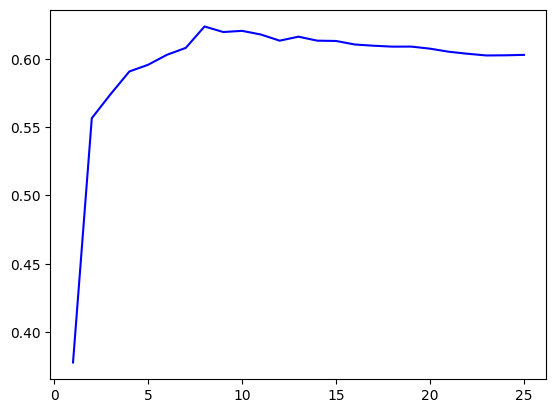

In [170]:
import matplotlib.pyplot as plt
plt.plot(trains, K, label='SalePrice', color='blue')

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [171]:
maior_valor = max(K)           
indice_maior = K.index(maior_valor)  
indice_maior

7

In [172]:
best_k = trains[K.index(max(K))] 
best_k 

8

<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### 🧪 Check your code

In [173]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/03-Performance-metrics/data-knn/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

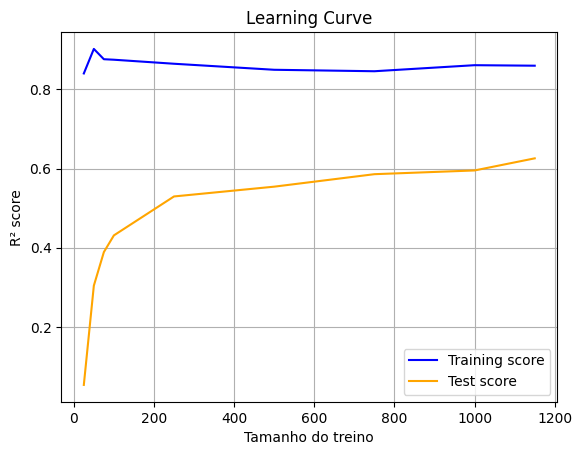

In [174]:
from sklearn.model_selection import learning_curve

train_sizes = [25, 50, 75, 100, 250, 500, 750, 1000, 1150]

# Coleta os scores
train_sizes, train_scores, test_scores = learning_curve(
   estimator=KNeighborsRegressor(n_neighbors=2), X=X1, y=y1, train_sizes=train_sizes, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


# Gráfico
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test score', color='orange')
plt.xlabel("Tamanho do treino")
plt.ylabel("R² score")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

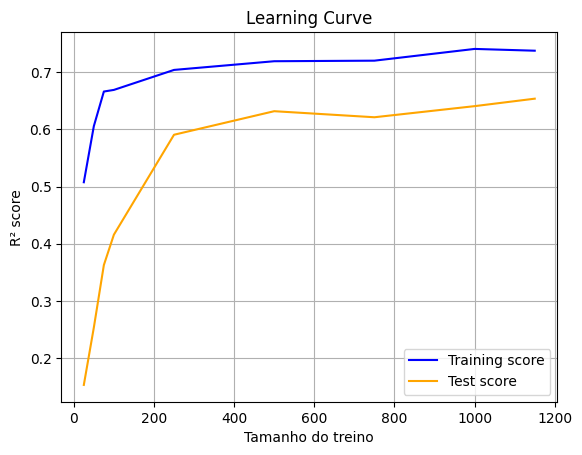

In [175]:
from sklearn.model_selection import learning_curve

train_sizes = [25, 50, 75, 100, 250, 500, 750, 1000, 1150]

# Coleta os scores
train_sizes, train_scores, test_scores = learning_curve(
   estimator=KNeighborsRegressor(n_neighbors=7), X=X1, y=y1, train_sizes=train_sizes, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


# Gráfico
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test score', color='orange')
plt.xlabel("Tamanho do treino")
plt.ylabel("R² score")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

💡 There are two key elements to remember when modelling with KNN models:  
    1. Distance-based algorithms are extremely sensitive to the scale of features  
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

<details>
<summary> 💡 Hint </summary>
    
The metric you should calculate is the **Negative Mean Absolute Error (MAE)**.

</details>

In [177]:
model = KNeighborsRegressor(n_neighbors=7)
cv_results3 = cross_validate(model,
                           X1_train,
                           y1_train,
                           cv=10,
                          scoring='neg_mean_absolute_error')


price_error = cv_results3['test_score'].mean()
price_error

-31324.460525957955

### 🧪 Check your code

In [178]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/03-Performance-metrics/data-knn/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [185]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

cv_lr = cross_validate(model_lr, X1_train, y1_train, cv=10, scoring='r2')
linear_score = cv_lr['test_score'].mean()
linear_score

0.5706284978231582

In [186]:
rescaled_score

0.6028300968363999

💡 When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

In [181]:
if rescaled_score > linear_score:
    best_model = "KNN"
else:
    best_model = "LinearReg"

### 🧪 Check your code

In [182]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/andreza/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/andreza/code/andrezaumbelino/05-ML/03-Performance-metrics/data-knn/tests
plugins: typeguard-2.13.3, asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁